In [1]:
import json

In [45]:
pop_path = "/Users/mrita/Desktop/Work/PhD/Population/json/population_1.json"
agents_path = "/Users/mrita/Desktop/Work/PhD/Population/json/agents.json"
game_path = "/Users/mrita/Desktop/Work/PhD/Population/json/onehotcompositionality_game.json"

In [19]:
def parse_population_json(json_file):

    with open(json_file) as f:
        pop_params_dict = json.load(f)

    n_agents = pop_params_dict["n_agents"]
    list_agents = pop_params_dict["list_agents"]
    population_type = pop_params_dict["population_type"]

    return n_agents, list_agents, population_type

In [20]:
t=parse_population_json(pop_path)

In [30]:
def parse_agents_json(json_file):

    with open(json_file) as f:
        agents = json.load(f)

    return agents

In [43]:
agents = parse_agents_json(agents_path)

In [44]:
agents

{'default_sender': {'sender': 1,
  'receiver': 0,
  'sender_cell': 'LSTM',
  'sender_num_layers': 1,
  'sender_hidden_size': 128,
  'sender_embed_dim': 128,
  'optimizer': 'Adam',
  'loss': 'REINFORCE',
  'reward': 'log',
  'learning_freq': 1,
  'lr': 0.0005,
  'entropy_reg': 0.002},
 'default_receiver': {'sender': 0,
  'receiver': 1,
  'receiver_cell': 'LSTM',
  'receiver_num_layers': 1,
  'receiver_hidden_size': 128,
  'receiver_embed_dim': 128,
  'optimizer': 'Adam',
  'loss': 'cross_entropy',
  'learning_freq': 1,
  'lr': 0.0005}}

In [47]:
def parse_game_json(json_file):

    with open(json_file) as f:
        game_params = json.load(f)

    return game_params

game_params = parse_agents_game(game_path)
game_params

{'game_name': 'one_hot_compositionality',
 'objects': {'n_attributes': 4, 'n_values': 4},
 'channel': {'voc_size': 20, 'max_len': 10}}

In [54]:
import torch as th

n_attributes = 4
n_values = 4
n=2

p=th.ones((n_attributes,n_values))/n_values
p[0,0],p[0,1],p[0,2],p[0,3]=0.1,0.2,0.3,0.4

print(p)


obj=th.multinomial(p, n, replacement=True).t()
obj_one_hot = th.nn.functional.one_hot(obj,num_classes = n_values)

obj_prob=obj_one_hot*p

obj_prob.sum(dim=2).prod(dim=1)

tensor([[0.1000, 0.2000, 0.3000, 0.4000],
        [0.2500, 0.2500, 0.2500, 0.2500],
        [0.2500, 0.2500, 0.2500, 0.2500],
        [0.2500, 0.2500, 0.2500, 0.2500]])
tensor([[1, 0, 1, 1],
        [3, 1, 3, 0]]) torch.Size([2, 4])
tensor([[[0, 1, 0, 0],
         [1, 0, 0, 0],
         [0, 1, 0, 0],
         [0, 1, 0, 0]],

        [[0, 0, 0, 1],
         [0, 1, 0, 0],
         [0, 0, 0, 1],
         [1, 0, 0, 0]]]) torch.Size([2, 4, 4])


tensor([0.0031, 0.0063])

In [13]:
labels = th.randint(0, 10, (9,))

print(labels)

# labels --> one-hot 
one_hot = th.nn.functional.one_hot(labels)

print(one_hot,one_hot.size())

tensor([5, 7, 7, 5, 9, 1, 0, 0, 5])
tensor([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]]) torch.Size([9, 10])


In [58]:
def f(x,y,m):
    
    return x + y + m

fn = lambda x,y : f(x,y,m=3)

print(fn(2,2))

7


In [74]:
th.multinomial(th.Tensor([1.,0.4,0.4,0.1]),10,replacement=True)

tensor([0, 0, 0, 2, 0, 2, 0, 0, 0, 2])

In [110]:
def build_one_hot_dataset(n_attributes,
                          n_values):
    
    
    dataset = th.Tensor(list(itertools.product(th.arange(n_values),repeat=n_attributes))).to(th.int64)
    dataset = th.nn.functional.one_hot(dataset, num_classes=n_values)
    
    return dataset

dataset = build_one_hot_dataset(n_attributes=4,
                                  n_values=4)

print(dataset.size())
print(dataset)

torch.Size([256, 4, 4])
tensor([[[1, 0, 0, 0],
         [1, 0, 0, 0],
         [1, 0, 0, 0],
         [1, 0, 0, 0]],

        [[1, 0, 0, 0],
         [1, 0, 0, 0],
         [1, 0, 0, 0],
         [0, 1, 0, 0]],

        [[1, 0, 0, 0],
         [1, 0, 0, 0],
         [1, 0, 0, 0],
         [0, 0, 1, 0]],

        ...,

        [[0, 0, 0, 1],
         [0, 0, 0, 1],
         [0, 0, 0, 1],
         [0, 1, 0, 0]],

        [[0, 0, 0, 1],
         [0, 0, 0, 1],
         [0, 0, 0, 1],
         [0, 0, 1, 0]],

        [[0, 0, 0, 1],
         [0, 0, 0, 1],
         [0, 0, 0, 1],
         [0, 0, 0, 1]]])


In [115]:
seed=19
dataset_size=256
split_proportion = 0.8
random_permut = np.random.RandomState(seed).choice(dataset_size, size=dataset_size, replace=False)

train_split, val_split = random_permut[:int(split_proportion*dataset_size)], \
                                 random_permut[int(split_proportion*dataset_size):]

print(len(train_split),len(val_split))

204 52


In [105]:
import itertools
import numpy as np

combination=th.Tensor(list(itertools.product(th.arange(n_values),repeat=n_attributes)))

print(combination.size())
print(type(combination))

torch.Size([256, 4])
<class 'torch.Tensor'>


In [145]:
print(th.Tensor([[0.2,0.05],[0.05,0.2]]).flatten())

print(th.multinomial(th.Tensor([[0.2,0.05],[0.05,0.2]]).flatten(),1))

tensor([0.2000, 0.0500, 0.0500, 0.2000])
tensor([1])


In [146]:
seed=19
dataset_size = 256
split_proportion = 0.8

random_permut = np.random.RandomState(seed).choice(dataset_size, size=dataset_size, replace=False)
train_split, val_split = random_permut[:int(split_proportion*dataset_size)], \
                                 random_permut[int(split_proportion*dataset_size):]

print(len(train_split))

204


In [163]:
message_length = th.Tensor([1,4,3,10]).to(th.int64)
max_len = 10

mask=1-th.cumsum(th.nn.functional.one_hot(message_length-1,max_len),dim=1)

print(mask)

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 0]])


In [186]:
a=th.Tensor([[[1,2,1]],[[2,3,10]]])
b=th.Tensor([[[2,1,1],[3,1,1]],[[2,1,1],[4,1,1]]])

cos=th.nn.CosineSimilarity(dim=2)
res=cos(a,b)

print(res.size())

print(res)

torch.Size([2, 2])
tensor([[0.8333, 0.7385],
        [0.6529, 0.4656]])


In [132]:
import torch as th
from torch.distributions import Categorical

prob=th.tensor([[0.25,0.25,0.25,0.25],[0.3,0.4,0.3,0.]])
thres = th.log(th.Tensor([0.3]))[0]

distr = Categorical(logits=th.log(prob))

x = distr.sample()

x_p = 1*(distr.log_prob(x)>=thres)*x

print(x_p)

tensor([3, 2])
tensor([0, 2])


In [51]:
import numpy as np

n_samples = 1000
n_messages = 100

counts_m = {}
counts_m_x = {}

x = np.random.choice(3,n_samples)

m=[]
for inp in x:
    if inp==0:
        m.append(np.random.choice(n_messages,1,p=np.ones(n_messages)/n_messages)[0])
    if inp==1:
        m.append(np.random.choice(n_messages,1,p=np.ones(n_messages)/n_messages)[0])
    if inp==2:
        m.append(np.random.choice(n_messages,1,p=np.ones(n_messages)/n_messages)[0])

for i in range(len(x)):
    x_i = x[i]
    m_i = m[i]
    if x_i in counts_m_x:
        if m_i in counts_m_x[x_i]:
            counts_m_x[x_i][m_i]+=1
        else:
            counts_m_x[x_i][m_i]=1
    else:
        counts_m_x[x_i]={}
        counts_m_x[x_i][m_i]=1
        
    if m_i in counts_m:
        counts_m[m_i]+=1
    else:
        counts_m[m_i]=1
        
        
MI = 0.

for x in counts_m_x:
    for m in counts_m:
        if m in counts_m_x[x]:
            N_m_x = counts_m_x[x][m]
            pi_m_x = counts_m_x[x][m]/np.sum(list(counts_m_x[x].values()))
            pi_m = counts_m[m] / np.sum(list(counts_m.values()))

            MI += pi_m_x/3 * np.log(pi_m_x/pi_m)
        
        

HX=-np.sum([pk * np.log(pk) for pk in [1/3,1/3,1/3]])
HM=-np.sum([pk * np.log(pk) for pk in [counts_m[m] / np.sum(list(counts_m.values())) for m in counts_m]])
        
print(counts_m_x)
print(counts_m)

print(MI,HX,HM)

{0: {52: 4, 75: 4, 96: 3, 31: 3, 38: 2, 24: 5, 3: 5, 94: 5, 64: 4, 98: 4, 83: 5, 36: 8, 76: 2, 12: 2, 9: 7, 29: 4, 1: 7, 84: 2, 86: 5, 54: 2, 5: 7, 21: 5, 67: 6, 74: 7, 91: 3, 8: 5, 23: 7, 60: 4, 35: 6, 39: 3, 92: 8, 20: 4, 99: 3, 37: 5, 69: 3, 89: 3, 55: 6, 17: 3, 2: 2, 70: 3, 73: 4, 59: 1, 10: 3, 97: 4, 56: 2, 78: 4, 68: 5, 11: 5, 65: 3, 34: 2, 82: 3, 58: 4, 66: 4, 19: 7, 14: 2, 16: 4, 26: 7, 48: 6, 62: 3, 42: 2, 93: 3, 61: 4, 4: 4, 47: 4, 81: 3, 30: 3, 51: 7, 22: 3, 79: 4, 40: 3, 32: 1, 63: 4, 44: 2, 33: 3, 53: 7, 95: 1, 18: 1, 6: 2, 88: 2, 45: 1, 49: 4, 77: 3, 13: 2, 25: 4, 41: 2, 87: 2, 50: 1, 15: 1, 72: 1, 28: 2, 71: 1, 7: 1, 0: 2, 46: 1}, 1: {67: 4, 57: 6, 9: 3, 63: 7, 13: 3, 85: 2, 79: 6, 30: 4, 72: 4, 96: 6, 66: 3, 73: 4, 0: 4, 41: 6, 78: 4, 32: 5, 29: 2, 42: 4, 18: 3, 21: 3, 7: 7, 98: 5, 49: 4, 68: 5, 12: 3, 19: 2, 43: 3, 52: 2, 17: 2, 55: 7, 71: 2, 34: 3, 86: 1, 77: 2, 60: 3, 23: 4, 82: 4, 40: 6, 45: 4, 61: 3, 35: 4, 80: 5, 14: 3, 33: 2, 15: 2, 50: 4, 5: 5, 10: 3, 65: 4, 87:

In [54]:
"".join([1,3,4].as_type(str))

AttributeError: 'list' object has no attribute 'as_type'

In [61]:
import torch as th

t=th.Tensor([[1,2],[3,4]])

th.tile(t,(2,1))

ImportError: cannot import name 'Categorical'

In [77]:
from torch.distributions import Categorical

t=th.log(th.Tensor([[0.8,0.2],[0.3,0.7]]))

print(t)

distr = Categorical(logits=t)

distr.log_prob(th.Tensor([0,1]))

tensor([[-0.2231, -1.6094],
        [-1.2040, -0.3567]])


tensor([-0.2231, -0.3567])

In [95]:
th.Tensor([0,1,2,3,4,5])[np.array([1,2])]

tensor([1., 2.])

In [129]:
N_m=3
N_x=100
t=th.tile(th.Tensor([1,2,3]),(N_x,1)).T
t=t.reshape([N_m*N_x])

print(t)

tt=th.tile(th.Tensor(np.arange(N_x)),(N_m,1))
tt=tt.reshape([N_m*N_x])
print(tt)

tt=tt.reshape([N_m,N_x])
print(tt.size())
tt=tt.sum(1)
tt=th.tile(tt,(N_x,1)).T
print(tt)

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 

In [133]:
n_x=10
log_pi_m = th.Tensor([1,2,3])

t=th.tile(log_pi_m, (n_x, 1))

print(t,t.size())

tensor([[1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.]]) torch.Size([10, 3])


In [137]:
import matplotlib.pyplot as plt

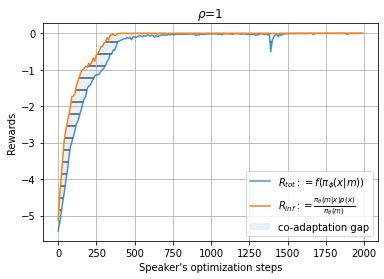

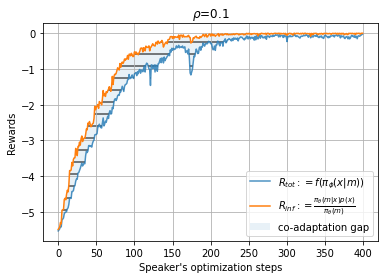

In [194]:
r=np.load("/Users/mrita/Desktop/Work/PhD/Population/numpy/medium1/r.npy")
r_int=np.load("/Users/mrita/Desktop/Work/PhD/Population/numpy/medium1/r_int.npy")
r_co=np.load("/Users/mrita/Desktop/Work/PhD/Population/numpy/medium1/r_co.npy")

plt.plot(10*np.arange(len(r)),r,alpha=0.8,label="$R_{tot}:=f(\pi_{\phi}(x|m))$")
plt.plot(10*np.arange(len(r)),r_co,label=r"$R_{inf}:=\frac{\pi_{\theta}(m|x)p(x)}{\pi_{\theta}(m)}$")
#plt.plot(10*np.arange(len(r)),r_int,alpha=0.75,label="$R_{co}:=R_{tot}-R_{inf}$",linestyle="--")
plt.fill_between(10*np.arange(len(r)),r,r_co,alpha=0.1,label="co-adaptation gap",hatch='-')
plt.title(r"$\rho$=1")
plt.grid()
plt.xlabel("Speaker's optimization steps")
plt.ylabel("Rewards")
plt.legend()
plt.show()

r=np.load("/Users/mrita/Desktop/Work/PhD/Population/numpy/slow01/r.npy")
r_int=np.load("/Users/mrita/Desktop/Work/PhD/Population/numpy/slow01/r_int.npy")
r_co=np.load("/Users/mrita/Desktop/Work/PhD/Population/numpy/slow01/r_co.npy")

plt.plot(r,alpha=0.8,label="$R_{tot}:=f(\pi_{\phi}(x|m))$")
plt.plot(r_co,label=r"$R_{inf}:=\frac{\pi_{\theta}(m|x)p(x)}{\pi_{\theta}(m)}$")
#plt.plot(r_int,alpha=0.75,label="$R_{co}:=R_{tot}-R_{inf}$",linestyle="--")
plt.fill_between(np.arange(len(r)),r,r_co,alpha=0.1,label="co-adaptation gap",hatch='-')
plt.title(r"$\rho$=0.1")
plt.grid()
plt.xlabel("Speaker's optimization steps")
plt.ylabel("Rewards")
plt.legend()
plt.show()

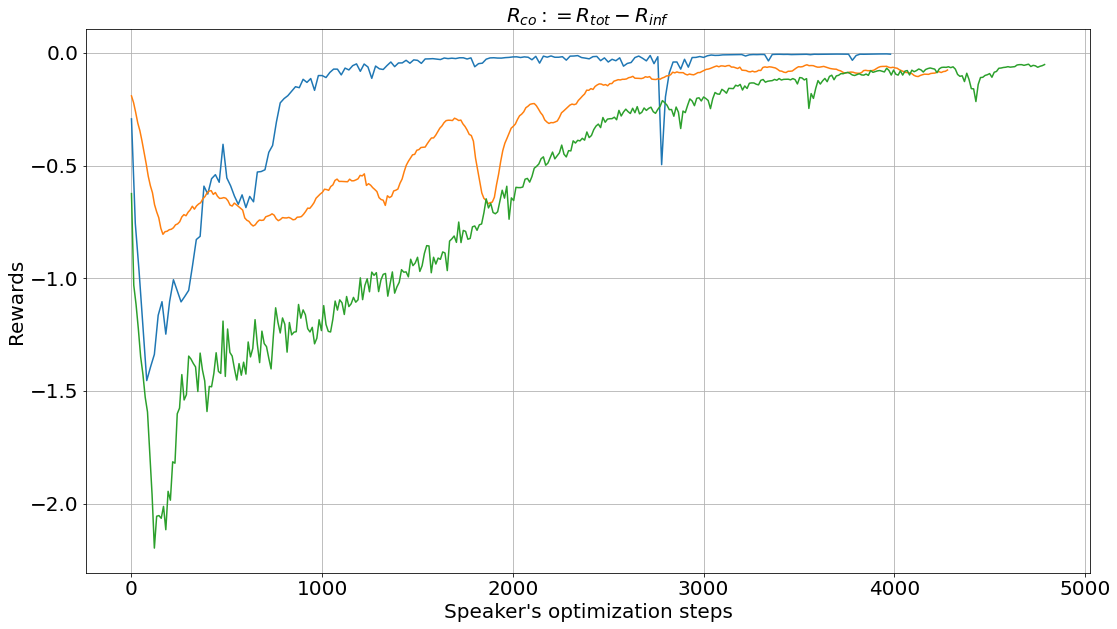

In [285]:
plt.figure(figsize=(18,10))

r_int=np.load("/Users/mrita/Desktop/Work/PhD/Population/numpy/medium1/r_int.npy")

plt.plot(20*np.arange(len(r_int)),r_int,label=r"$\rho$=0.1")


r_int=np.load("/Users/mrita/Desktop/Work/PhD/Population/numpy/slow01/r_int.npy")

r_int_smooth=[]

for i in range(0,len(r_int)-10):
    r_int_smooth.append(np.mean(r_int[i:i+10]))

plt.plot(11*np.arange(len(r_int_smooth)),r_int_smooth,label=r"$\rho$=1")

r_int=np.load("/Users/mrita/Desktop/Work/PhD/Population/numpy/fast02/r_int.npy")

plt.plot(12*np.arange(len(r_int)),r_int,label=r"$\rho$=5")

plt.xlabel("Speaker's optimization steps",size=20)
plt.ylabel("Rewards",size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.title(r"$R_{co}:=R_{tot}-R_{inf}$",size=20)
plt.grid()
plt.show()

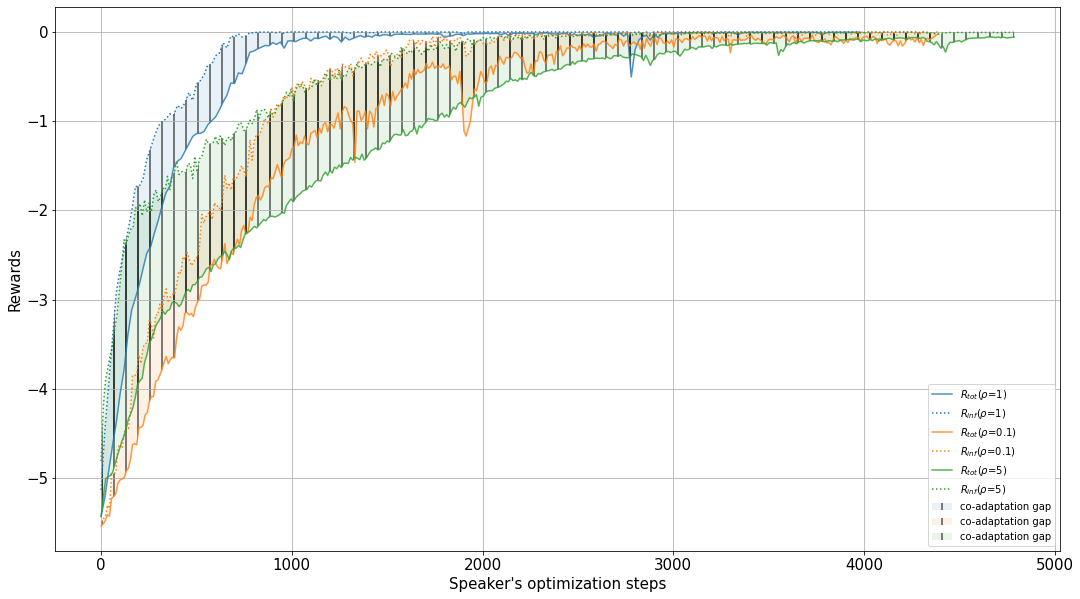

In [282]:
plt.figure(figsize=(18,10))

r=np.load("/Users/mrita/Desktop/Work/PhD/Population/numpy/medium1/r.npy")
r_int=np.load("/Users/mrita/Desktop/Work/PhD/Population/numpy/medium1/r_int.npy")
r_co=np.load("/Users/mrita/Desktop/Work/PhD/Population/numpy/medium1/r_co.npy")

plt.plot(20*np.arange(len(r)),r,alpha=0.8,label=r"$R_{tot}$($\rho$=1)",color="tab:blue")
plt.plot(20*np.arange(len(r)),r_co,label=r"$R_{inf}$($\rho$=1)",linestyle=":",color="tab:blue")
#plt.plot(10*np.arange(len(r)),r_int,alpha=0.75,label="$R_{co}:=R_{tot}-R_{inf}$",linestyle="--")
plt.fill_between(20*np.arange(len(r)),r,r_co,alpha=0.1,label="co-adaptation gap",hatch='|')
plt.grid()
plt.xlabel("Speaker's optimization steps",size=15)
plt.ylabel("Rewards",size=15)

r=np.load("/Users/mrita/Desktop/Work/PhD/Population/numpy/slow01/r.npy")
r_int=np.load("/Users/mrita/Desktop/Work/PhD/Population/numpy/slow01/r_int.npy")
r_co=np.load("/Users/mrita/Desktop/Work/PhD/Population/numpy/slow01/r_co.npy")

plt.plot(11*np.arange(len(r)),r,alpha=0.8,label=r"$R_{tot}$($\rho$=0.1)",color="tab:orange")
plt.plot(11*np.arange(len(r)),r_co,label=r"$R_{inf}$($\rho$=0.1)",linestyle=":",color="tab:orange")
#plt.plot(r_int,alpha=0.75,label="$R_{co}:=R_{tot}-R_{inf}$",linestyle="--")
plt.fill_between(11*np.arange(len(r)),r,r_co,alpha=0.1,label="co-adaptation gap",hatch='|')

r=np.load("/Users/mrita/Desktop/Work/PhD/Population/numpy/fast02/r.npy")
r_int=np.load("/Users/mrita/Desktop/Work/PhD/Population/numpy/fast02/r_int.npy")
r_co=np.load("/Users/mrita/Desktop/Work/PhD/Population/numpy/fast02/r_co.npy")

plt.plot(12*np.arange(len(r)),r,alpha=0.8,label=r"$R_{tot}$($\rho$=5)",color="tab:green")
plt.plot(12*np.arange(len(r)),r_co,label=r"$R_{inf}$($\rho$=5)",linestyle=":",color="tab:green")
#plt.plot(r_int,alpha=0.75,label="$R_{co}:=R_{tot}-R_{inf}$",linestyle="--")
plt.fill_between(12*np.arange(len(r)),r,r_co,alpha=0.1,label="co-adaptation gap",hatch='|')

plt.xticks(size=15)
plt.yticks(size=15)

plt.legend()

plt.show()

In [250]:
import gzip

f = gzip.open("/Users/mrita/Desktop/Homo_sapiens.GRCh38.105.chromosome.1.dat.gz", 'r')
file_content = f.read().decode('utf-8')

NameError: name 'pd' is not defined

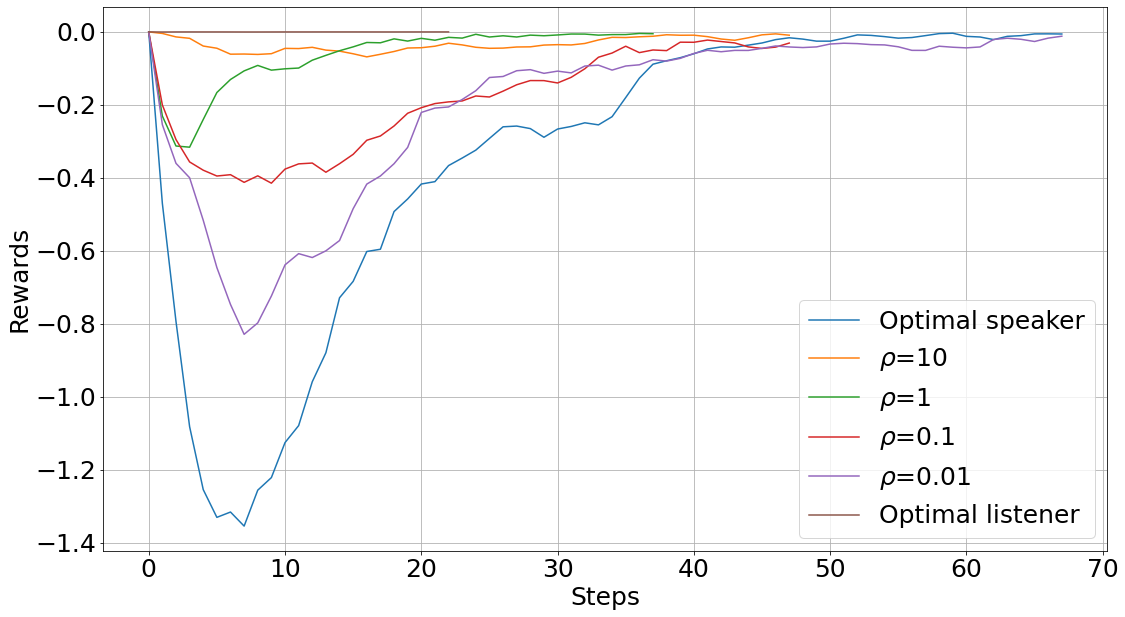

In [280]:
plt.figure(figsize=(18,10))


r_co=np.load("/Users/mrita/Desktop/Work/PhD/Population/MI_expe/optimal_speaker/r_co.npy")

r_co_smooth=[0.]

for i in range(len(r_co)-3):
    r_co_smooth.append(np.mean(r_co[i:i+3]))

plt.plot(r_co_smooth,label=r"Optimal speaker")

r_co=np.load("/Users/mrita/Desktop/Work/PhD/Population/MI_expe/01-1/r_co.npy")

r_co_smooth=[0.]

for i in range(len(r_co)-3):
    r_co_smooth.append(np.mean(r_co[i:i+3]))

plt.plot(r_co_smooth,label=r"$\rho$=10")


r_co=np.load("/Users/mrita/Desktop/Work/PhD/Population/MI_expe/1-1/r_co.npy")

r_co_smooth=[0.]

for i in range(len(r_co)-3):
    r_co_smooth.append(np.mean(r_co[i:i+3]))

plt.plot(r_co_smooth,label=r"$\rho$=1")

r_co=np.load("/Users/mrita/Desktop/Work/PhD/Population/MI_expe/1-01/r_co.npy")

r_co_smooth=[0.]

for i in range(len(r_co)-3):
    r_co_smooth.append(np.mean(r_co[i:i+3]))

plt.plot(r_co_smooth,label=r"$\rho$=0.1")

r_co=np.load("/Users/mrita/Desktop/Work/PhD/Population/MI_expe/1-001/r_co.npy")

r_co_smooth=[0.]

for i in range(len(r_co)-3):
    r_co_smooth.append(np.mean(r_co[i:i+3]))

plt.plot(r_co_smooth,label=r"$\rho$=0.01")

r_co=np.load("/Users/mrita/Desktop/Work/PhD/Population/MI_expe/optimal_listener/r_co.npy")

r_co_smooth=[0.]

for i in range(len(r_co)-3):
    r_co_smooth.append(np.mean(r_co[i:i+3]))

plt.plot(r_co_smooth,label=r"Optimal listener")

plt.xticks(size=25)
plt.yticks(size=25)
plt.grid()
plt.xlabel("Steps",size=25)
plt.ylabel("Rewards",size=25)


plt.legend(fontsize=25)

plt.show()

In [304]:
import torch as th 

n_samples=100

batch = th.ones(100,4,4)
batch = th.tile(batch,[n_samples]+[1]*(len(batch.size())-1))

print(batch.size())

torch.Size([10000, 4, 4])


In [17]:
import editdistance
import numpy as np
import torch as th

editdistance.eval(np.array([0,1,2]),np.array([0,1,2]))

0

In [14]:
language_similarity=np.array([[1,2],[2,1]])
print(language_similarity)
unique_sim = [language_similarity[i,j] for i in range(len(language_similarity)-1) \
                              for j in range(i+1,len(language_similarity))]

print(unique_sim)

[[1 2]
 [2 1]]
[2]


In [20]:
2%1

0